## Student Name: Christian Clarke

In [72]:
#import any required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE, SelectKBest, f_regression
import keras
from keras.models import Sequential
from keras.layers import Dense

### Step 1 – Data Acquisition
Load the training data 'house_prices_train.csv' into a dataframe. Explore the data to get a better understanding of its structure and any data preparation steps that you need to perform.

In [73]:
#Load the data and view the dimensions
#TODO: provide the url for the training data
url      = 'https://raw.githubusercontent.com/davashu/module-08-feed-forward-neural-networks-clarkech95/master/house_prices_train.csv?token=APVD6MIBYXPKR2P64IAXFPC7CNWEA' 
data     = pd.read_csv(url)
data_dim = data.shape

print ('There are {} rows and {} columns.'.format(data_dim[0], data_dim[1]))

There are 1460 rows and 81 columns.


Lets view samples of the data

In [74]:
#view a few observations
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Use your intuition!
At first glance is there any field that, without a doubt, will not contribute to the predictions?

In [75]:
#TODO: remove/exclude the unnecessary field(s) that will not contribute towards the prediction
data.drop('Id', axis = 1, inplace = True)

### Step 2 – Data Exploration
- Gather summary/descriptive statistics and inspect **all the fields**. This can help you to identify outliers and detect any inconsistencies
- View the frequency of missing values.

In [76]:
#TODO: gather descriptive statistics to view the range of values in each field. 
data.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [77]:
#TODO: show the frequency of missing values
[ (i,data[i].isna().sum(), len(data[i].value_counts())) for i in data.columns if data[i].isna().sum() > 0]

[('LotFrontage', 259, 110),
 ('Alley', 1369, 2),
 ('MasVnrType', 8, 4),
 ('MasVnrArea', 8, 327),
 ('BsmtQual', 37, 4),
 ('BsmtCond', 37, 4),
 ('BsmtExposure', 38, 4),
 ('BsmtFinType1', 37, 6),
 ('BsmtFinType2', 38, 6),
 ('Electrical', 1, 5),
 ('FireplaceQu', 690, 5),
 ('GarageType', 81, 6),
 ('GarageYrBlt', 81, 97),
 ('GarageFinish', 81, 3),
 ('GarageQual', 81, 5),
 ('GarageCond', 81, 5),
 ('PoolQC', 1453, 3),
 ('Fence', 1179, 4),
 ('MiscFeature', 1406, 4)]

State your observations about the summary statistics and missing values **(in this cell)**:
- There are quite a few columns with a significant amount of missing values, those columns should probably be removed entirely since imputing them will be too difficult and can skew the data.
- There are a few columns where it seems almost all of the data falls into a singular bucket, those columns should also potentially be removed since there is little variation and thus may have a lower ability to tell us anything about the data.
- The vast majority of columns aren't missing any data which is excellent!
- There are a large amount of categorical columns which means we'll have to do a bit of encoding, even a few of the continous columns are actually categorical and have just been encoded already.
- There is a decent amount of variety in the sales prices of the properties in the dataset, also since the mean is greater than the median we have a few very highly priced homes that don't fit the norm.

Note: recall that not all missing values need to be deleted, some of them can be imputed.

#### The continuous and categorical independent variables
List the continuous and categorical data and state any discrepancy between the number of expected records in the dataset and the `count` that is reported above. 

For the fields that are discussed, view `data_description.txt` which explains the range of values for each field. What does this tell you about these 'missing' values. How do you recommend addressing them? **(You do not need to demonstrate your recommendations)**


In [78]:
[(i,data[i].dtype) for i in data.columns]

# The discrepancies seem to be based on missing values not being accounted for
# They actually aren't missing values at all but indicative of a true state in the data
# They just need to be changed into an appropriate value for the field they are in
# They don't need to be deleted
# Columns where nearly all of the values are 'missing' should proably still be removed though

[('MSSubClass', dtype('int64')),
 ('MSZoning', dtype('O')),
 ('LotFrontage', dtype('float64')),
 ('LotArea', dtype('int64')),
 ('Street', dtype('O')),
 ('Alley', dtype('O')),
 ('LotShape', dtype('O')),
 ('LandContour', dtype('O')),
 ('Utilities', dtype('O')),
 ('LotConfig', dtype('O')),
 ('LandSlope', dtype('O')),
 ('Neighborhood', dtype('O')),
 ('Condition1', dtype('O')),
 ('Condition2', dtype('O')),
 ('BldgType', dtype('O')),
 ('HouseStyle', dtype('O')),
 ('OverallQual', dtype('int64')),
 ('OverallCond', dtype('int64')),
 ('YearBuilt', dtype('int64')),
 ('YearRemodAdd', dtype('int64')),
 ('RoofStyle', dtype('O')),
 ('RoofMatl', dtype('O')),
 ('Exterior1st', dtype('O')),
 ('Exterior2nd', dtype('O')),
 ('MasVnrType', dtype('O')),
 ('MasVnrArea', dtype('float64')),
 ('ExterQual', dtype('O')),
 ('ExterCond', dtype('O')),
 ('Foundation', dtype('O')),
 ('BsmtQual', dtype('O')),
 ('BsmtCond', dtype('O')),
 ('BsmtExposure', dtype('O')),
 ('BsmtFinType1', dtype('O')),
 ('BsmtFinSF1', dtype('i

#### The dependent variable
Are there any discrepancies with the dependent variable? Plot a histogram showing its distribution. Is the distribution skewed?

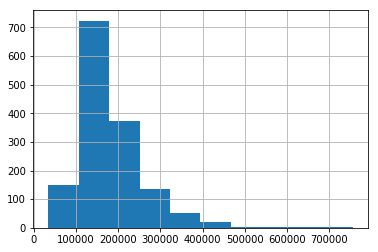

In [79]:
#TODO: Plot the histogram
data['SalePrice'].hist()

# No apparent discrepancies
# The distribution is skewed to the right though as expected from the describe output

## Building the Pipeline
Based on your recommendations above, lets build a pipeline that does the following:
- prepare the data and perform data imputation
- transform the continuous and categorical data (scaling and encoding respectively)
- select the useful features e.g. feature selection, *you can optionally include this in the pipeline or perform this step prior to building the pipeline*
- build, train and evaluate the neural network using Keras.
- perform hyper-parameter tuning using RandomSearchCV **(optional)**
- make predictions with new data

### Step 3 – Data Preparation
Here is some helpful information on [preprocessing and feature extraction pipelines in scikit-learn](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

<span style="color:red">NOTE: You can modify the cell below to suit your needs. However, ensure that the preprocessing steps that you perform is done in the data frame e.g. `data` </span>

In [80]:
# Drop fields where more than 92% of all values are the same
#for col in data.columns:
#    if data[col].isna().sum() > 0:
#        if data[col].dtype == 'float64':
#            data[col].fillna(0, inplace = True)
#        else:
#            data[col].fillna('none', inplace = True)
#for col in data.columns:
#    if (data[col].value_counts()/data[col].value_counts().sum()).iat[0] > .92:
#        data.drop(col, axis = 1, inplace = True)
#data.shape

In [81]:
#impute missing continuous values with the median and scale the data

continuous_features  = [i for i in data.columns if data[i].dtype == 'float64' or data[i].dtype == 'int64'  and i != 'SalePrice'] #TODO: provide a list of continuous fields that will be used in the model(except the dependent variable)
continous_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])

#impute the NA categorical values and encode the data

categorical_features = [i for i in data.columns if data[i].dtype == 'O'] #TODO: provide a list of categorical fields that will be used in the model
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

data_preprocessor   = ColumnTransformer(
    transformers = [
        ('continious', continous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

#NOTE: the steps above will not be performed until we call `fit_transform` (in the next cell).


### Step 4 – Data Transformation & Feature Selection
Here is some helpful information on [feature selection as part of a pipeline](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline). If you add a feature selection algorithm to the pipeline, ensure that it supports regression.

In [82]:
data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor), #This performs the data preparation steps in the cell above
                     ('feature_selection', SelectKBest(score_func = f_regression, k = 17) #TODO: identify a feature selection algorithm or exclude this line if you have previously performed feature selection on the data.
                                                          ), 
                    ])

transformed_data    = data_prep_pipeline.fit_transform(data.iloc[:, :-1], data['SalePrice']) #transform the data


### Step 5 – Building the Model
#### Build the neural network using Keras
Build a feed forward neural network with: an input layer, hidden layers and one output layer. 

Note: you are required to provide a suitable [optimizer](https://keras.io/api/optimizers/) and [loss function](https://keras.io/api/losses/) for the regression task. Optimizers include: 'Adam', 'SGD' and RMSprop. Loss functions include: 'mean_squared_error', 'mean_squared_logarithmic_error', 'mean_absolute_error'

In [96]:
X = transformed_data.toarray() #this is the transformed data from the pipeline
y = data['SalePrice'] #this is the output

#Build a sequential model with at least three dense layers (you can add more layers as needed)
#Note: you can also add this keras model to the data preprocessing pipeline but we can skip that step for now.
ffnn_model = Sequential()
ffnn_model.add(Dense(40, activation='relu', input_shape=(X.shape[1],))) #X.shape[1] is the number of selected features 

#TODO: Add the first hidden layer with a suitable number of units/neurons and the 'relu' activation function
#TODO: Add the second hidden layer with a suitable number of units/neurons and the 'relu' activation function
ffnn_model.add(Dense(100, activation = 'relu'))
ffnn_model.add(Dense(100, activation = 'relu'))
#TODO: Add the output layer
ffnn_model.add(Dense(1))
ffnn_model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01), #TODO: state the optimize
                   loss= keras.losses.MeanSquaredError(),      #TODO: state the loss function
                   metrics= [keras.metrics.MeanAbsolutePercentageError()]     #TODO: state the metric
                  )

ffnn_history = ffnn_model.fit(X, y, 
                              validation_split= 0.3, #TODO: state the validation split
                              epochs= 48, #TODO: state the number of epochs (you may need to run the model a few times to find a suitable value)
                              batch_size=64 , #TODO: state the number of observations to use in each batch
                              verbose=1)


Epoch 1/48
16/16 [==============================] - 0s 15ms/step - loss: 39340683264.0000 - mean_absolute_percentage_error: 99.9103 - val_loss: 37934698496.0000 - val_mean_absolute_percentage_error: 99.5395
Epoch 2/48
16/16 [==============================] - 0s 8ms/step - loss: 37425487872.0000 - mean_absolute_percentage_error: 97.0990 - val_loss: 32711876608.0000 - val_mean_absolute_percentage_error: 91.1632
Epoch 3/48
16/16 [==============================] - 0s 7ms/step - loss: 23815704576.0000 - mean_absolute_percentage_error: 73.5544 - val_loss: 9414905856.0000 - val_mean_absolute_percentage_error: 45.1783
Epoch 4/48
16/16 [==============================] - 0s 7ms/step - loss: 5902906880.0000 - mean_absolute_percentage_error: 37.9661 - val_loss: 6064299008.0000 - val_mean_absolute_percentage_error: 31.8435
Epoch 5/48
16/16 [==============================] - 0s 7ms/step - loss: 3823553280.0000 - mean_absolute_percentage_error: 28.5616 - val_loss: 4238645760.0000 - val_mean_absolute_

Epoch 41/48
16/16 [==============================] - 0s 6ms/step - loss: 954413696.0000 - mean_absolute_percentage_error: 12.1305 - val_loss: 1963329024.0000 - val_mean_absolute_percentage_error: 13.8256
Epoch 42/48
16/16 [==============================] - 0s 6ms/step - loss: 956110656.0000 - mean_absolute_percentage_error: 11.8248 - val_loss: 1852399360.0000 - val_mean_absolute_percentage_error: 13.5048
Epoch 43/48
16/16 [==============================] - 0s 6ms/step - loss: 958289216.0000 - mean_absolute_percentage_error: 11.8410 - val_loss: 1879990656.0000 - val_mean_absolute_percentage_error: 13.6638
Epoch 44/48
16/16 [==============================] - 0s 7ms/step - loss: 940417920.0000 - mean_absolute_percentage_error: 12.0315 - val_loss: 1805649664.0000 - val_mean_absolute_percentage_error: 13.0761
Epoch 45/48
16/16 [==============================] - 0s 6ms/step - loss: 944247872.0000 - mean_absolute_percentage_error: 11.9787 - val_loss: 1925107712.0000 - val_mean_absolute_percen

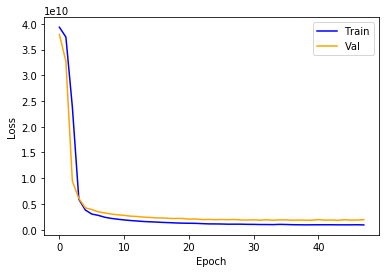

In [97]:
# Visualize the training and validation loss
plt.plot(ffnn_history.history['loss'], 'b', ffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Let's use the neural network to make predictions!

#### Load the test data

In [85]:
#TODO: Load the data from `house_prices_test.csv`
test_data_url = 'https://raw.githubusercontent.com/clarkech95/fwd-feed-neural-netwrk/master/house_prices_test.csv'
test_data = pd.read_csv(test_data_url)


#### Prepare the test data using the pipeline
This will impute any missing values and scale/encode the fields.

In [86]:
prep_test_data = data_prep_pipeline.transform(test_data)

C:\Users\clark\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


#### Use the neural network to make predictions

In [87]:
result = ffnn_model.predict( #TODO: provide the preprocessed test data (above)
        prep_test_data)

## Summary
Display samples of the predictions from your model and summarize your thoughts on the model's performance, the training process and its ability to generalize with new data. What are your recommendations to improve the model in the future?

In [88]:
print(result[:10])

[[115027.11]
 [ 84085.95]
 [199257.75]
 [172810.92]
 [181332.94]
 [206765.84]
 [246815.9 ]
 [203583.22]
 [168945.58]
 [115747.22]]


In [89]:
print(pd.DataFrame(result).describe())

                   0
count    1459.000000
mean   171945.765625
std     84327.656250
min     41396.203125
25%    115869.054688
50%    144842.218750
75%    204720.289062
max    924075.062500


I think the model performed fairly well and did a good job of generalizing new data. After a certain point the ability to improve the model tapers off and there is little increase to performance with each additional iteration. I think the best thing for imrpoving this dataset would be to add more training data to it. This would allow our already optimized model to better interpret patterns for new data.